In [88]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import joblib

In [27]:
excel_file=r"C:\Users\ujjwa\Downloads\af60b10b8dad38110304 (1).xlsx"
years=range(2010,2017)

In [28]:
import pandas as pd

excel_file = r"C:\Users\ujjwa\Downloads\af60b10b8dad38110304 (1).xlsx"
years = range(2010, 2017)

# 1. Commodity
all_dfs_com = []
for year in years:
    sheet_name = f'{year}_Detail_Commodity'
    df_year = pd.read_excel(excel_file, sheet_name=sheet_name)
    df_year['Year'] = year
    df_year['Source'] = 'Commodity'
    df_year.columns = df_year.columns.str.strip()
    df_year.rename(columns={"Commodity Code": "Code", "Commodity Name": "Name"}, inplace=True)
    all_dfs_com.append(df_year)

df_detail_commodity = pd.concat(all_dfs_com, ignore_index=True)

# 2. Industry
all_dfs_ind = []
for year in years:
    sheet_name = f'{year}_Detail_Industry'
    df_year = pd.read_excel(excel_file, sheet_name=sheet_name)
    df_year['Year'] = year
    df_year['Source'] = 'Industry'
    df_year.columns = df_year.columns.str.strip()
    df_year.rename(columns={"Industry Code": "Code", "Industry Name": "Name"}, inplace=True)
    all_dfs_ind.append(df_year)

df_detail_industry = pd.concat(all_dfs_ind, ignore_index=True)

# 3. Combine both
all_data = pd.concat([df_detail_commodity, df_detail_industry], ignore_index=True)

# Preview
all_data.head()


,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Year,Source
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,2010,Commodity
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,2010,Commodity
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,2010,Commodity
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,2010,Commodity
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,2010,Commodity


In [29]:
import pandas as pd

excel_file = r"C:\Users\ujjwa\Downloads\af60b10b8dad38110304 (1).xlsx"
years = range(2010, 2017)
all_data = []

for year in years:
    try:
        # Read both sheets
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        # Add Source and Year
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        # Strip whitespace from column names (important for renaming)
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        # Rename columns to have a unified schema
        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        # Combine both and append to all_data list
        combined = pd.concat([df_com, df_ind], ignore_index=True)
        all_data.append(combined)

    except Exception as e:
        print(f"❌ Error processing year {year}: {e}")

# Final combined dataframe
df_all_detail = pd.concat(all_data, ignore_index=True)

# View the result
df_all_detail.head()


,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [30]:
df_all_detail.shape

(22092, 15)

In [31]:
len(all_data)

7

In [32]:
df_all_detail

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22087,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.009,0.000,0.009,NaN,4,2,1,5,1,Industry,2016
22088,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,2,1,5,1,Industry,2016
22089,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,2,1,5,1,Industry,2016
22090,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,2,1,5,1,Industry,2016


In [33]:
df=df_all_detail.copy()

In [34]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [35]:
df.isnull().sum()

Code                                                          0
Name                                                          0
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
Unnamed: 7                                                22092
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
dtype: int64

In [36]:
df[df.duplicated()]
# no duplicates

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year


In [37]:
# df[df['Source']=="Industry"]

In [38]:
df.drop(columns=["Unnamed: 7"],axis=1,inplace=True)

In [39]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [40]:
df.head()


,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,4,3,1,4,1,Commodity,2010


# univariate analysis

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


<Axes: xlabel='Supply Chain Emission Factors with Margins', ylabel='Count'>

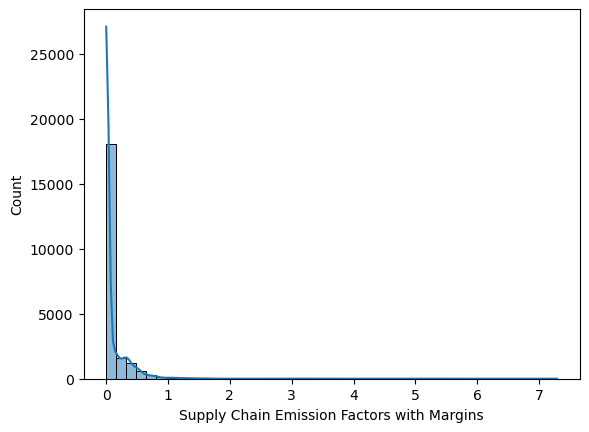

In [42]:
sns.histplot(df["Supply Chain Emission Factors with Margins"],kde=True,bins=45)
# target value distribution

In [43]:
df['Supply Chain Emission Factors with Margins'].skew(),df['Supply Chain Emission Factors with Margins'].var()

for i in df.select_dtypes(include="number").columns:
    print(f"For {i} The variance is {df[i].var()} and skewness is {df[i].skew()} . \n")

For Supply Chain Emission Factors without Margins The variance is 0.0713099655444455 and skewness is 11.928560139806502 . 

For Margins of Supply Chain Emission Factors The variance is 0.006196763620610686 and skewness is 24.99231271061484 . 

For Supply Chain Emission Factors with Margins The variance is 0.08351666442694872 and skewness is 10.28103551915709 . 

For DQ ReliabilityScore of Factors without Margins The variance is 0.24964263582650068 and skewness is 0.38585153670996336 . 

For DQ TemporalCorrelation of Factors without Margins The variance is 0.24490904505386574 and skewness is -0.28869473672557355 . 

For DQ GeographicalCorrelation of Factors without Margins The variance is 0.0 and skewness is 0.0 . 

For DQ TechnologicalCorrelation of Factors without Margins The variance is 1.289724984779865 and skewness is -0.2042998077549177 . 

For DQ DataCollection of Factors without Margins The variance is 0.0 and skewness is 0.0 . 

For Year The variance is 4.000181069213707 and sk

In [44]:
df['Substance'].value_counts()

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64

In [45]:
df['Unit'].value_counts()

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64

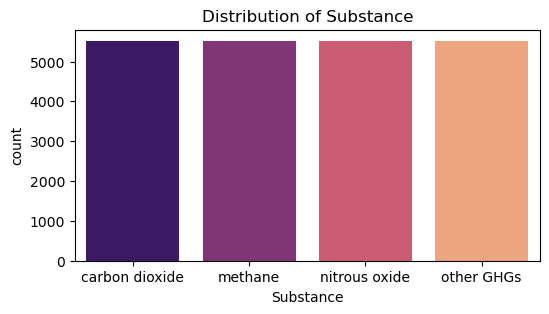

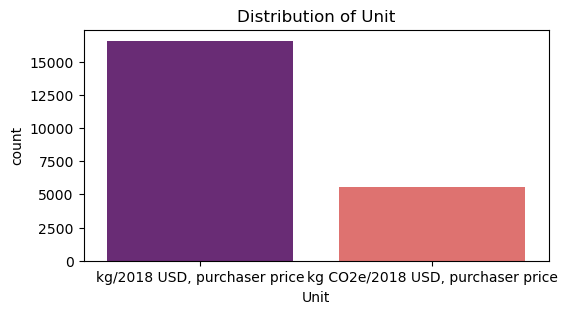

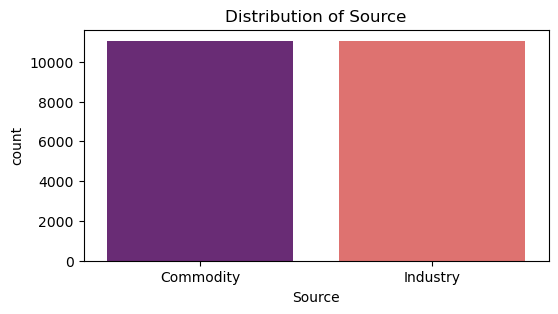

In [46]:
for i in df.drop(columns=["Code","Name"],axis=1).select_dtypes(include="object").columns:
   plt.figure(figsize=(6,3))      
   plt.title(f"Distribution of {i}")      
   sns.countplot(data = df,x=i,palette='magma',hue=i)      
   plt.show()

In [47]:
df_num=df.select_dtypes(include="number")

In [48]:
skewed_col=[col for col in df_num.columns if df[col].skew()!=0]
skewed_col

['Supply Chain Emission Factors without Margins',
 'Margins of Supply Chain Emission Factors',
 'Supply Chain Emission Factors with Margins',
 'DQ ReliabilityScore of Factors without Margins',
 'DQ TemporalCorrelation of Factors without Margins',
 'DQ TechnologicalCorrelation of Factors without Margins']

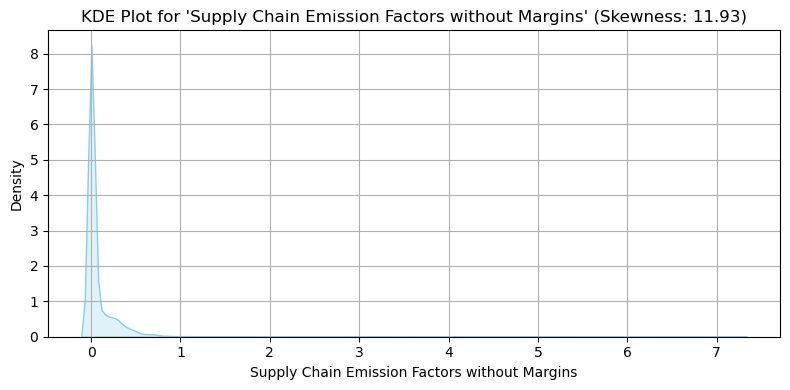

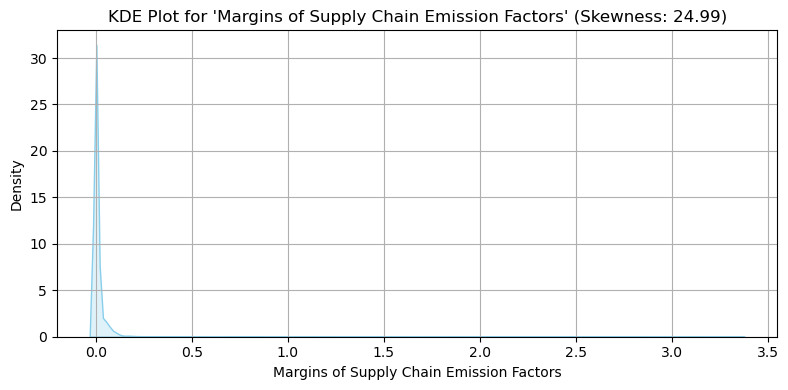

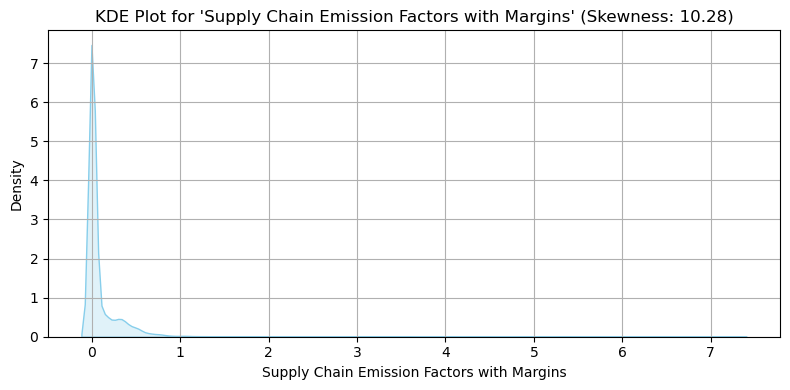

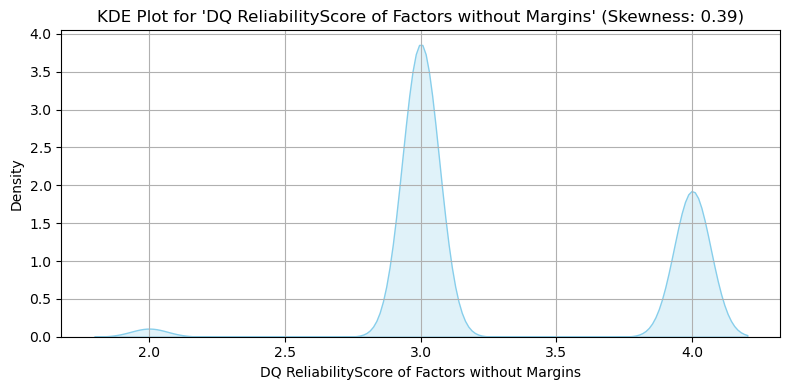

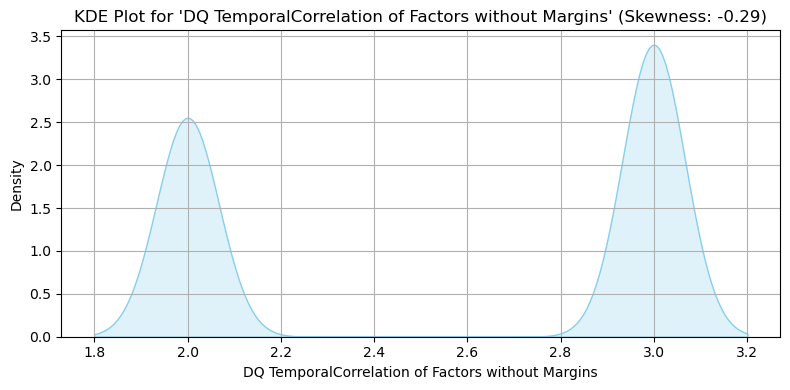

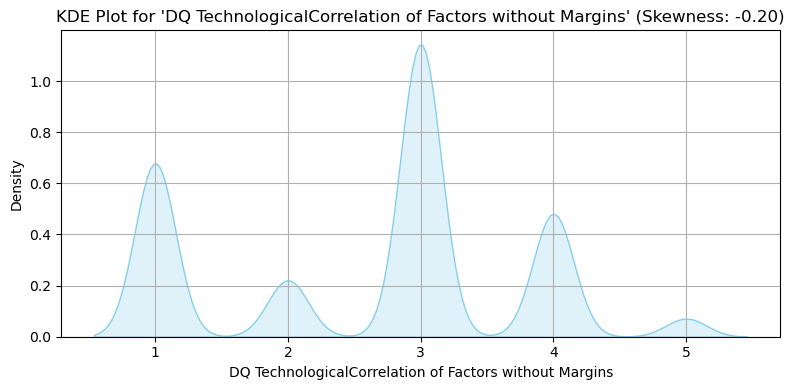

In [49]:
# Plot KDE for each skewed column
for col in skewed_col:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, fill=True, color='skyblue')
    plt.title(f"KDE Plot for '{col}' (Skewness: {df[col].skew():.2f})")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [50]:
# sns.kdeplot(data=df, x='DQ ReliabilityScore of Factors without Margins', hue='Name', fill=True)

In [81]:
df_features = df.copy()

In [82]:
df_features['Margin_Ratio'] = df_features['Margins of Supply Chain Emission Factors'] / (
    df_features['Supply Chain Emission Factors without Margins'] + 1e-8)

df_features['Efficiency_Score'] = df_features['Supply Chain Emission Factors without Margins'] / (
    df_features['Supply Chain Emission Factors with Margins'] + 1e-8)


# Quality score combinations

In [84]:

quality_cols = [
    'DQ ReliabilityScore of Factors without Margins',
    'DQ TemporalCorrelation of Factors without Margins',
    'DQ GeographicalCorrelation of Factors without Margins',
    'DQ TechnologicalCorrelation of Factors without Margins',
    'DQ DataCollection of Factors without Margins'
]

df_features['Total_Quality_Score'] = df_features[quality_cols].sum(axis=1)
df_features['Avg_Quality_Score'] = df_features[quality_cols].mean(axis=1)
df_features['Min_Quality_Score'] = df_features[quality_cols].min(axis=1)
df_features['Max_Quality_Score'] = df_features[quality_cols].max(axis=1)

In [85]:
df_features['Years_Since_2010'] = df_features['Year'] - 2010

In [51]:
 df["Margins of Supply Chain Emission Factors"]=np.log1p(df['Margins of Supply Chain Emission Factors'])
 df["Supply Chain Emission Factors with Margins"]=np.log1p(df['Supply Chain Emission Factors with Margins'])
 df["Supply Chain Emission Factors without Margins"]=np.log1p(df['Supply Chain Emission Factors without Margins'])



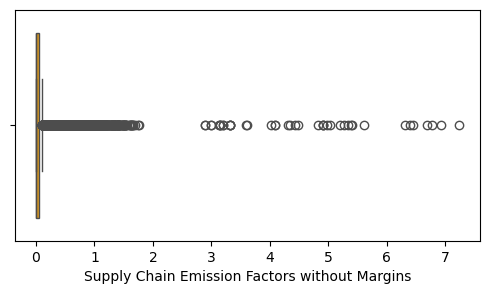

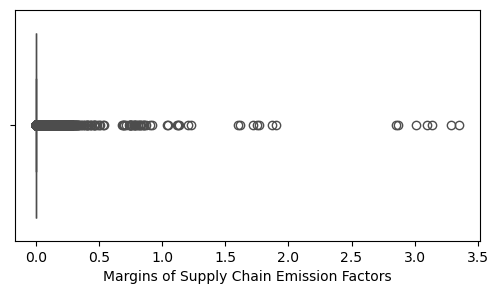

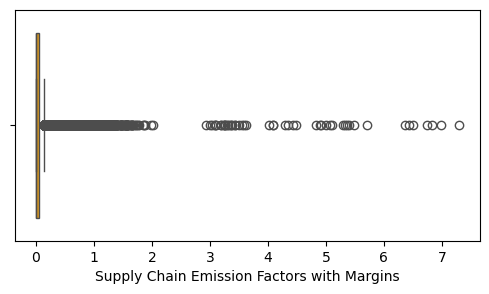

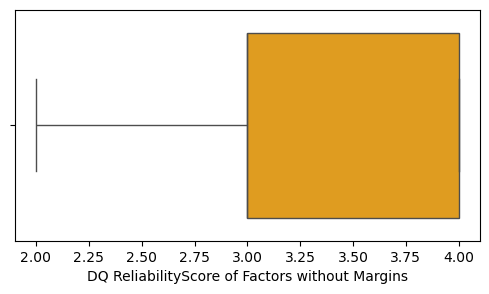

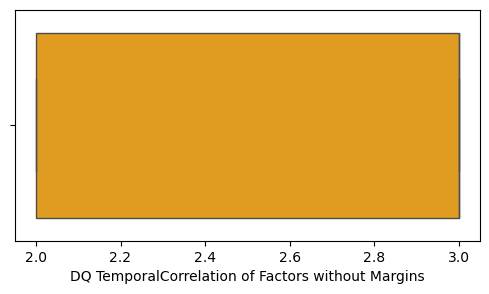

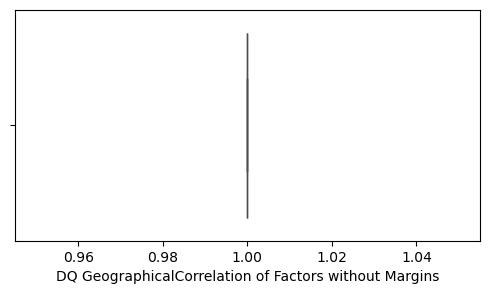

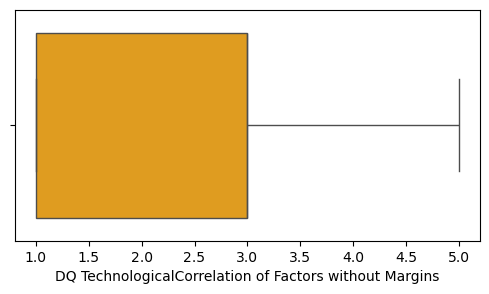

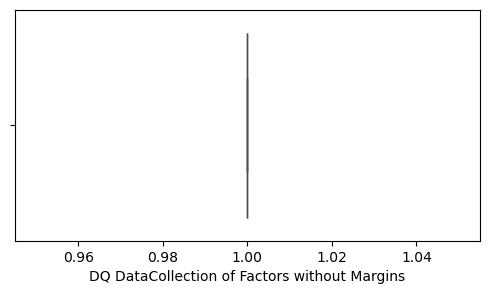

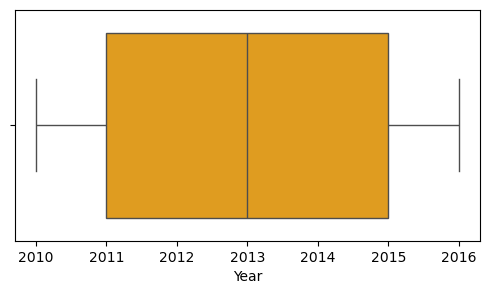

In [52]:
for i in df_num.columns:
    plt.figure(figsize=(6,3)) 
    sns.boxplot(data=df_num,x=i,color="orange",orient="x")
    plt.show()


# capping the outliers to preserve data inseated of removing outliers

In [53]:
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping
    data[column] = np.where(data[column] < lower_bound, lower_bound,
                            np.where(data[column] > upper_bound, upper_bound, data[column]))
    return data
columns_to_cap = [
    'Supply Chain Emission Factors with Margins',
    'Supply Chain Emission Factors without Margins',
    'Margins of Supply Chain Emission Factors'
]

df_capped = df.copy()
for col in columns_to_cap:
    df_capped = cap_outliers_iqr(df_capped, col)


(22092, 14)
(22092, 14)


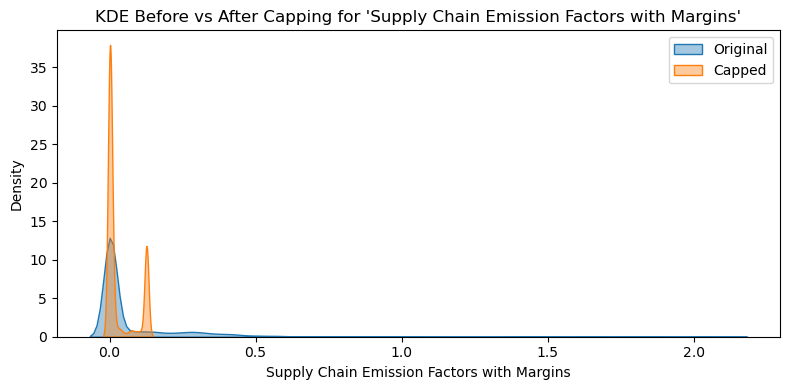

(22092, 14)
(22092, 14)


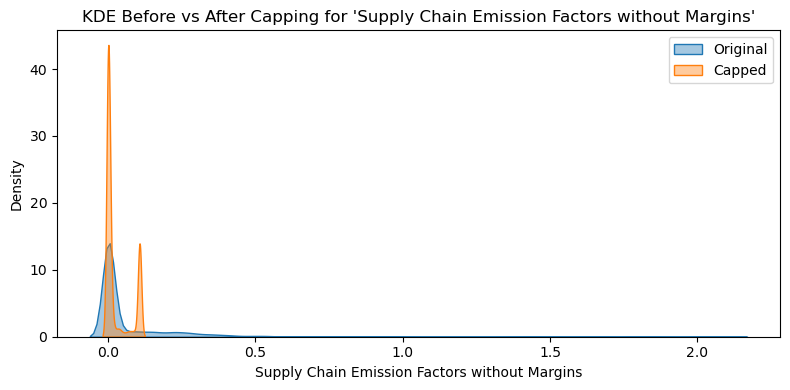

(22092, 14)
(22092, 14)


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_18640\842946070.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_capped[col], label='Capped', fill=True, alpha=0.4)


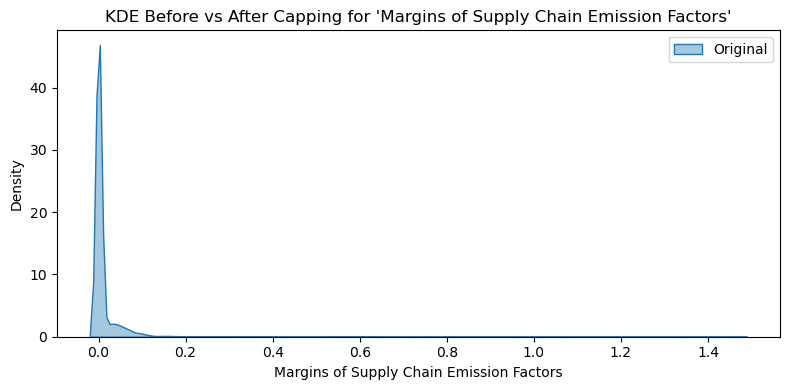

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in columns_to_cap:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], label='Original', fill=True, alpha=0.4)
    print(df.shape)
    sns.kdeplot(df_capped[col], label='Capped', fill=True, alpha=0.4)
    print(df_capped.shape)
    plt.title(f"KDE Before vs After Capping for '{col}'")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


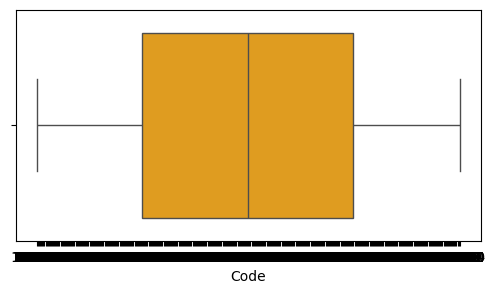

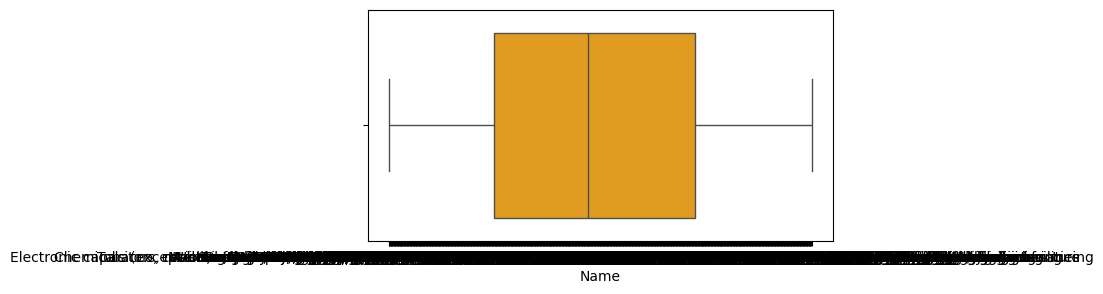

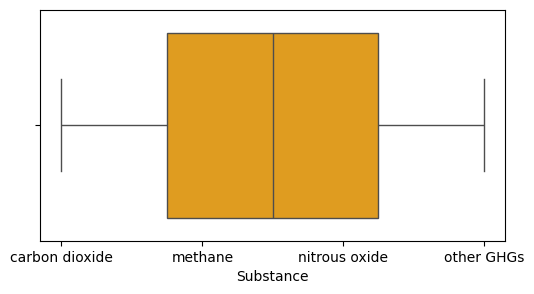

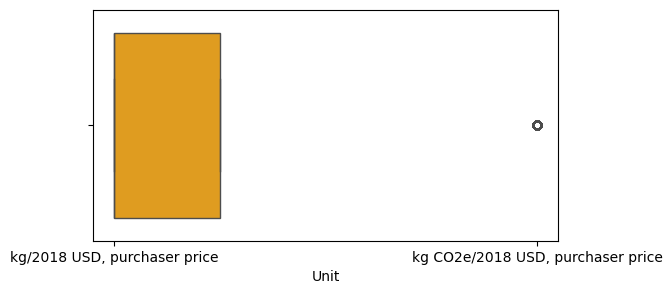

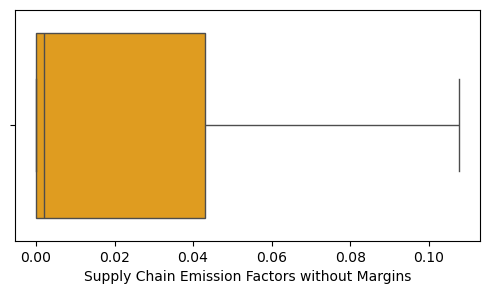

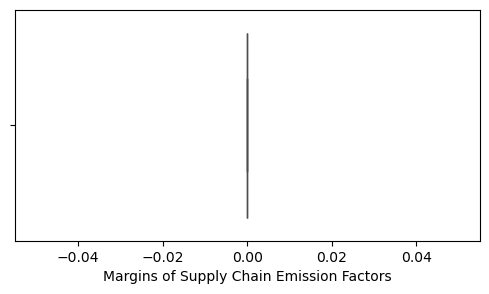

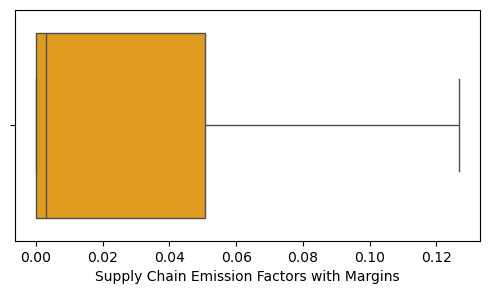

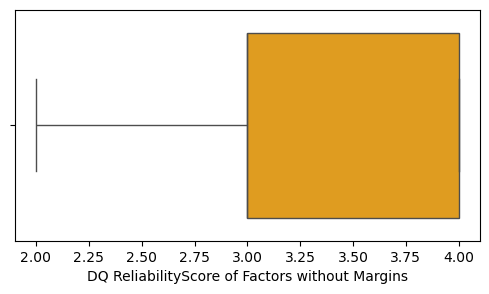

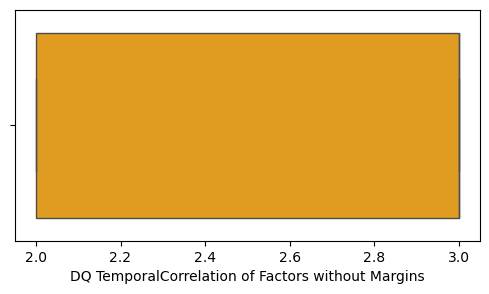

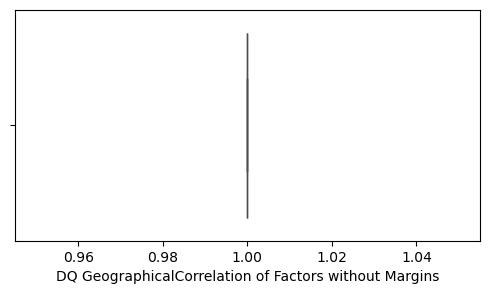

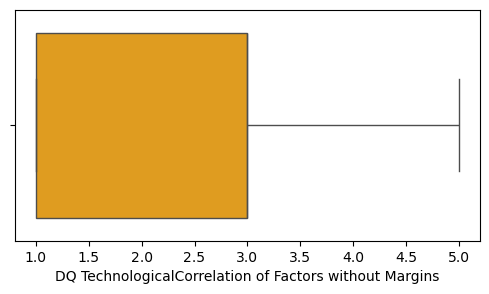

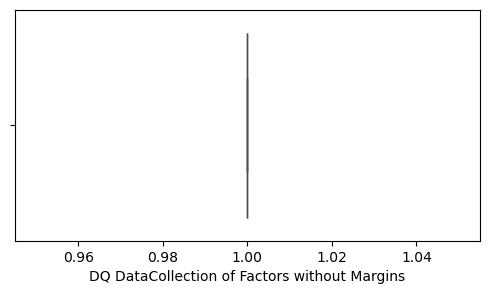

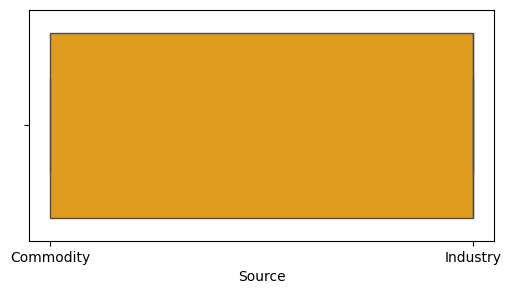

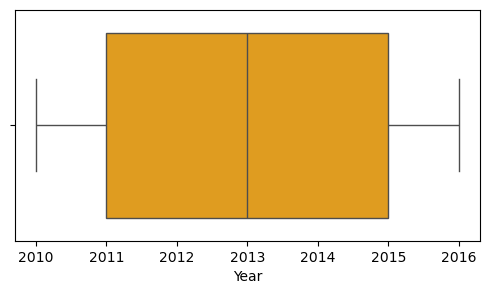

In [55]:
for i in df_capped.columns:
    plt.figure(figsize=(6,3)) 
    sns.boxplot(data=df_capped,x=i,color="orange",orient="x")
    plt.show()


# checking normality

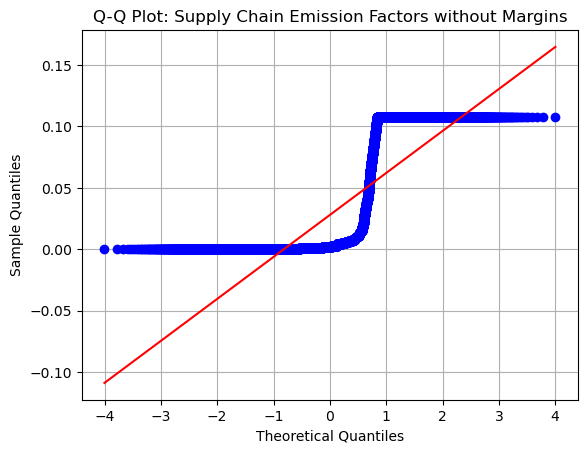

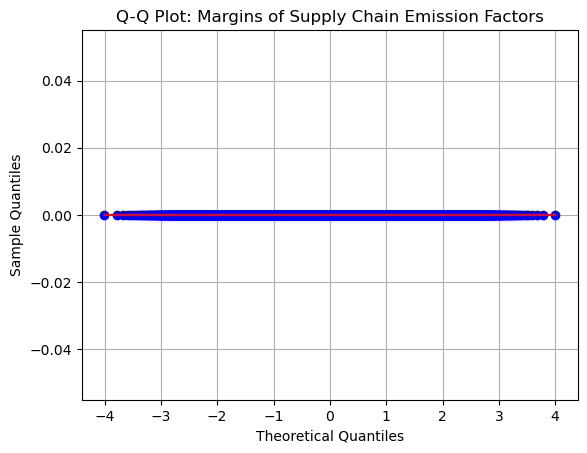

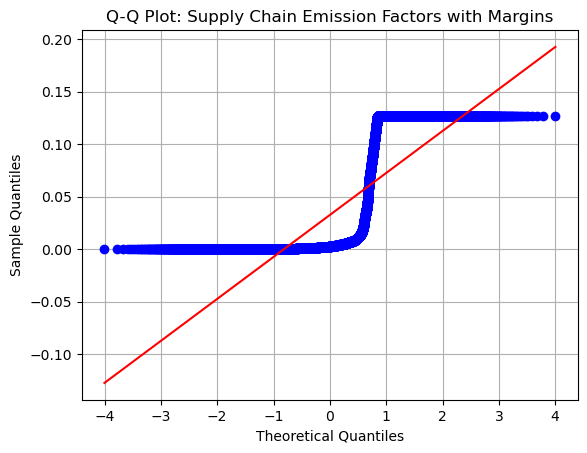

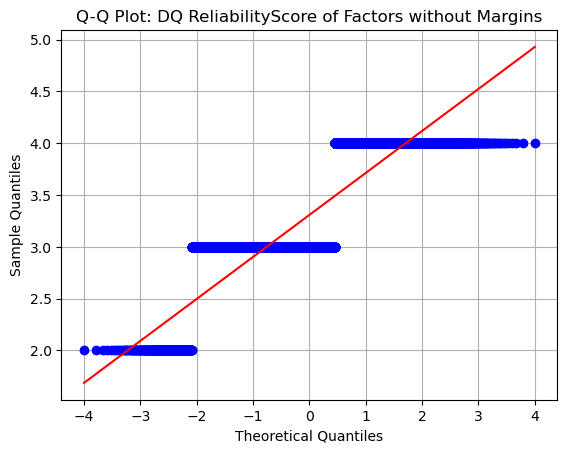

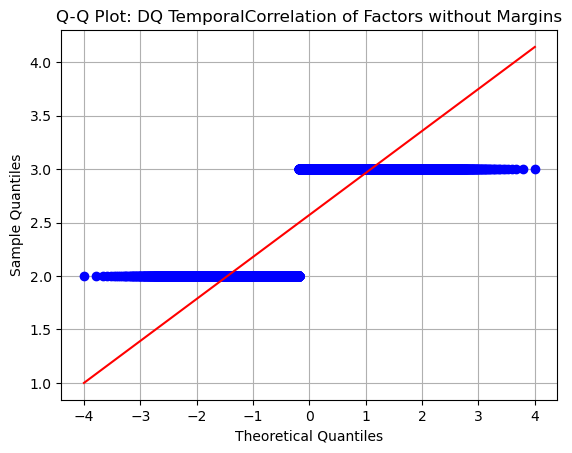

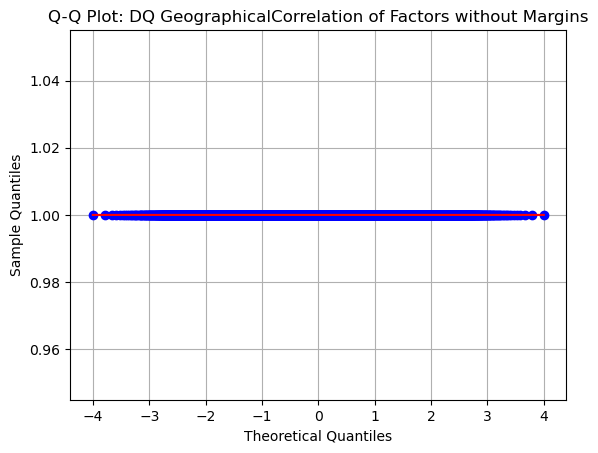

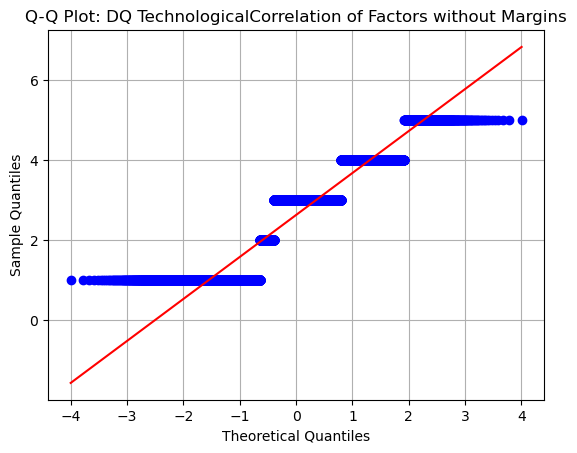

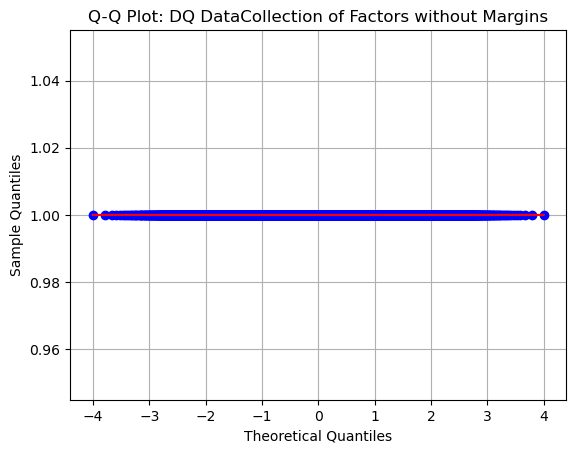

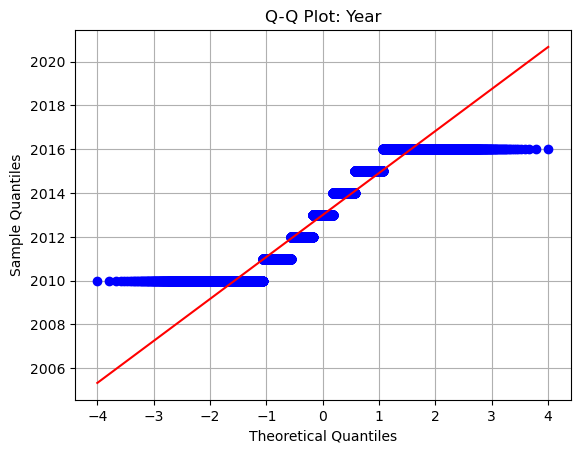

In [56]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Replace with your actual column name
# column_name = 'Weight Capacity (kg)'
for i in df_num.columns:
    # Q-Q Plot
    stats.probplot(df_capped[i], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {i}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid()
    plt.show()


In [57]:
from sklearn.preprocessing import PowerTransformer

columns_to_transform = [
    'Supply Chain Emission Factors with Margins',
    'Supply Chain Emission Factors without Margins',
    'Margins of Supply Chain Emission Factors'
]
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df_transformed = df_capped.copy()
df_transformed[columns_to_transform] = pt.fit_transform(df[columns_to_transform])


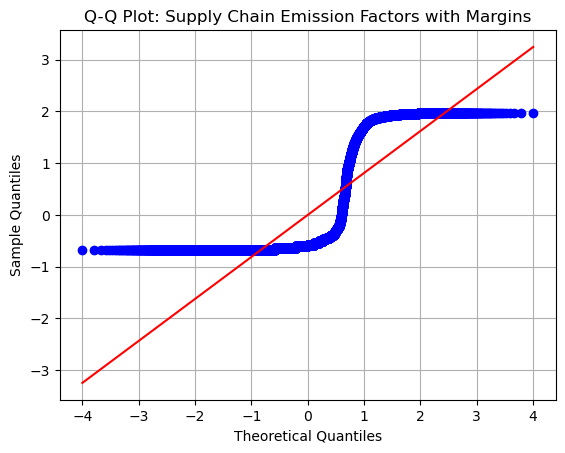

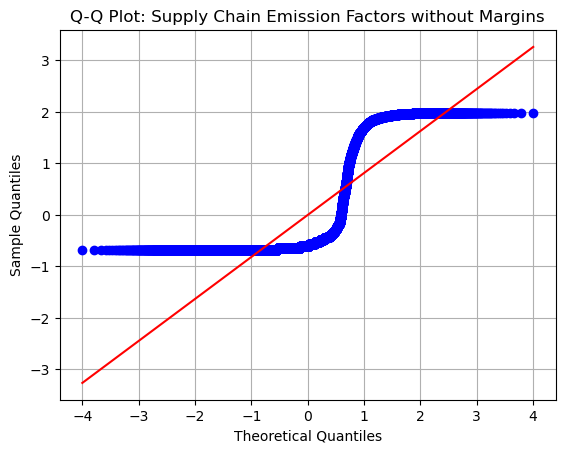

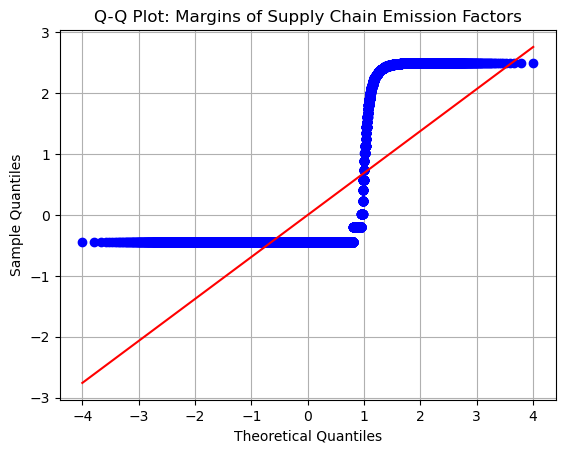

In [58]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Replace with your actual column name
# column_name = 'Weight Capacity (kg)'
for i in columns_to_transform:
    # Q-Q Plot
    stats.probplot(df_transformed[i], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {i}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid()
    plt.show()


In [76]:
# df_transformed

In [60]:
df.select_dtypes(exclude = "float").nunique()
# unique values in all cat col

Code                                                      395
Name                                                      713
Substance                                                   4
Unit                                                        2
DQ ReliabilityScore of Factors without Margins              3
DQ TemporalCorrelation of Factors without Margins           2
DQ GeographicalCorrelation of Factors without Margins       1
DQ TechnologicalCorrelation of Factors without Margins      5
DQ DataCollection of Factors without Margins                1
Source                                                      2
Year                                                        7
dtype: int64

# bivariate 

<Axes: xlabel='Substance', ylabel='Supply Chain Emission Factors with Margins'>

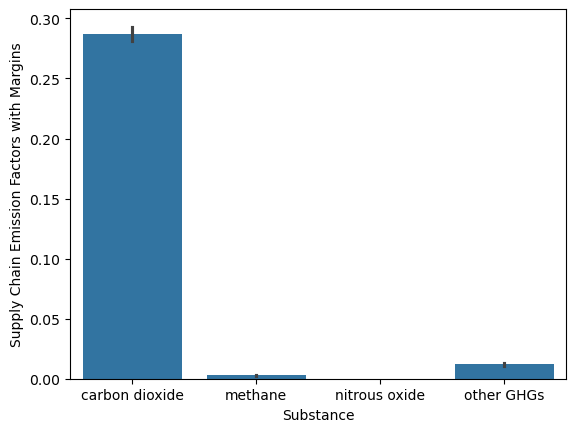

In [61]:
sns.barplot(data=df,x="Substance",y="Supply Chain Emission Factors with Margins")

In [62]:
df_num=df.select_dtypes(include="number")

C:\Users\ujjwa\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\ujjwa\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


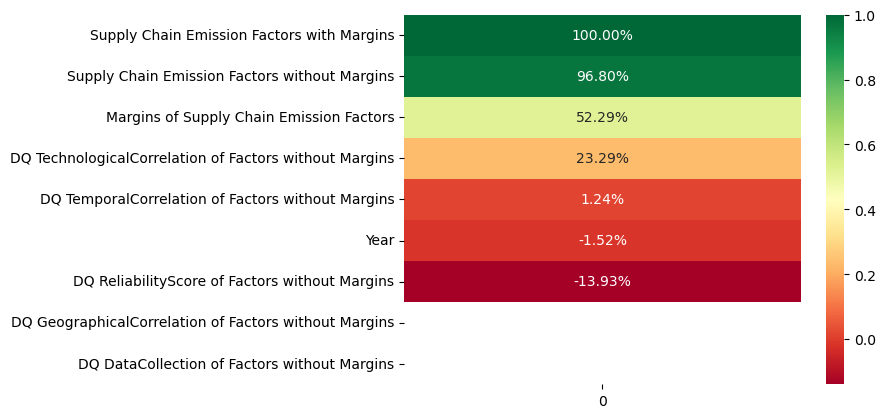

In [63]:
correlation = df_num[df_num.columns].corrwith(df['Supply Chain Emission Factors with Margins']) 

sorted_correlation = correlation.sort_values(ascending=False)

heatmap = sns.heatmap(pd.DataFrame(sorted_correlation), annot=True, cmap='RdYlGn',fmt=".2%", cbar=True)
plt.show()

<Axes: xlabel='Substance'>

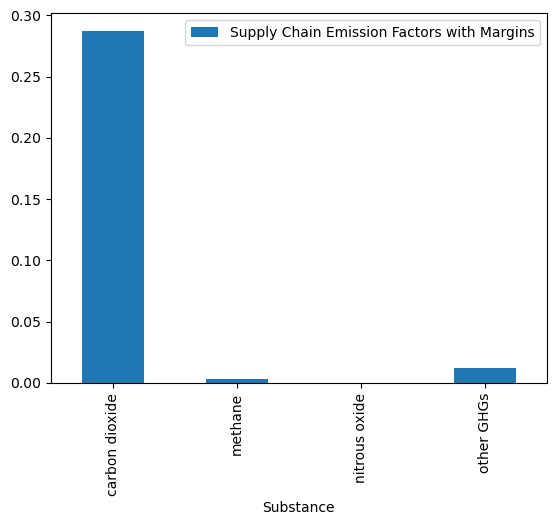

In [64]:
df.pivot_table(
    index="Substance",
    values='Supply Chain Emission Factors with Margins',
    aggfunc='mean'
).plot(kind="bar")


In [65]:
df.pivot_table(
    index='Year',
    columns='Substance',
    values='Supply Chain Emission Factors with Margins',
    aggfunc='mean'
)

Substance,carbon dioxide,methane,nitrous oxide,other GHGs
Year,,,,
2010,0.303008,0.003178,0.000100,0.011493
2011,0.299039,0.002935,0.000101,0.013741
2012,0.286565,0.002798,0.000097,0.011854
2013,0.287681,0.002768,0.000096,0.011694
2014,0.284203,0.002649,0.000091,0.011937
2015,0.277132,0.002704,0.000100,0.011430
2016,0.274083,0.002773,0.000090,0.010803


In [66]:
df.pivot_table(
    index='Year',
    columns='Name',
    values='Supply Chain Emission Factors with Margins',
    aggfunc='max'
)

Name,Abrasive product manufacturing,Abrasive products,Accommodation,"Accounting, tax preparation, bookkeeping, and payroll","Accounting, tax preparation, bookkeeping, and payroll services",Adhesive manufacturing,Adhesives,Advertising and public relations,"Advertising, public relations, and related services",Agriculture and forestry support,...,Wireless communications,Wireless telecommunications,Wireless telecommunications carriers (except satellite),Wiring device manufacturing,Wiring devices,Wood kitchen cabinet and countertop manufacturing,Wood kitchen cabinets and countertops,Wood pulp,"Wooden windows, door, and flooring",other miscellaneous electrical equipment and components
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.248421,0.287432,0.221542,0.058269,0.066724,0.483660,0.179818,0.114221,0.107957,0.268499,...,0.193921,0.116894,0.131028,0.319181,0.351361,0.279146,0.242946,0.607589,0.265436,0.220741
2011,0.240590,0.279902,0.215918,0.057325,0.064851,0.478096,0.178983,0.112435,0.106160,0.279146,...,0.191446,0.115113,0.127513,0.311887,0.345715,0.273837,0.239804,0.591668,0.262364,0.215918
2012,0.230318,0.272315,0.198031,0.053541,0.059212,0.454890,0.169743,0.107059,0.098034,0.270027,...,0.179818,0.108854,0.118672,0.294906,0.329304,0.257738,0.227932,0.573800,0.250759,0.205387
2013,0.232698,0.276115,0.199670,0.054488,0.060154,0.462475,0.173113,0.107957,0.098940,0.267734,...,0.181488,0.108854,0.119559,0.293416,0.327143,0.257738,0.227932,0.574364,0.250759,0.205387
2014,0.231905,0.269263,0.198031,0.052592,0.059212,0.502592,0.194744,0.107059,0.098940,0.253091,...,0.178146,0.107957,0.119559,0.300105,0.330742,0.263133,0.228728,0.579418,0.246860,0.198851
2015,0.231905,0.270790,0.184818,0.050693,0.056380,0.494696,0.193921,0.103459,0.094401,0.276874,...,0.170586,0.103459,0.113329,0.290428,0.320633,0.250759,0.218332,0.576613,0.237441,0.192272
2016,0.229523,0.272315,0.179818,0.049742,0.054488,0.483660,0.188966,0.101654,0.091667,0.275356,...,0.168899,0.101654,0.110647,0.281412,0.312619,0.246079,0.215918,0.581657,0.236652,0.189794


In [67]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse_output=False,drop='first',dtype=np.int32),["Unit","Substance","Source"])
],remainder='passthrough')

transformer.fit_transform(df)


array([[1, 0, 0, ..., 4, 1, 2010],
       [1, 1, 0, ..., 1, 1, 2010],
       [1, 0, 1, ..., 4, 1, 2010],
       ...,
       [1, 1, 0, ..., 5, 1, 2016],
       [1, 0, 1, ..., 5, 1, 2016],
       [0, 0, 0, ..., 5, 1, 2016]], dtype=object)

In [69]:
transformer.get_feature_names_out()

array(['tnf1__Unit_kg/2018 USD, purchaser price',
       'tnf1__Substance_methane', 'tnf1__Substance_nitrous oxide',
       'tnf1__Substance_other GHGs', 'tnf1__Source_Industry',
       'remainder__Code', 'remainder__Name',
       'remainder__Supply Chain Emission Factors without Margins',
       'remainder__Margins of Supply Chain Emission Factors',
       'remainder__Supply Chain Emission Factors with Margins',
       'remainder__DQ ReliabilityScore of Factors without Margins',
       'remainder__DQ TemporalCorrelation of Factors without Margins',
       'remainder__DQ GeographicalCorrelation of Factors without Margins',
       'remainder__DQ TechnologicalCorrelation of Factors without Margins',
       'remainder__DQ DataCollection of Factors without Margins',
       'remainder__Year'], dtype=object)

In [72]:
print("\n=== FEATURE ENGINEERING ===")


=== FEATURE ENGINEERING ===


In [77]:
df_features = df_transformed.copy()

In [78]:
df_features['Margin_Ratio'] = df_features['Margins of Supply Chain Emission Factors'] / (
    df_features['Supply Chain Emission Factors without Margins'] + 1e-8)

df_features['Efficiency_Score'] = df_features['Supply Chain Emission Factors without Margins'] / (
    df_features['Supply Chain Emission Factors with Margins'] + 1e-8)

In [79]:
df_features

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year,Margin_Ratio,Efficiency_Score
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",1.947243,2.490472,1.935383,4,3,1,4,1,Commodity,2010,1.278973,1.006128
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",-0.640813,-0.204867,-0.605553,4,3,1,1,1,Commodity,2010,0.319699,1.058228
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",-0.602355,-0.448746,-0.605553,4,3,1,4,1,Commodity,2010,0.744987,0.994719
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",-0.602355,-0.448746,-0.605553,3,3,1,3,1,Commodity,2010,0.744987,0.994719
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",1.978013,2.494155,1.962222,4,3,1,4,1,Commodity,2010,1.260939,1.008048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22087,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",-0.350380,-0.448746,-0.378371,4,2,1,5,1,Industry,2016,1.280742,0.926022
22088,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",-0.679921,-0.448746,-0.675036,4,2,1,5,1,Industry,2016,0.659998,1.007236
22089,814000,Private households,methane,"kg/2018 USD, purchaser price",-0.679921,-0.448746,-0.675036,4,2,1,5,1,Industry,2016,0.659998,1.007236
22090,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",-0.679921,-0.448746,-0.675036,4,2,1,5,1,Industry,2016,0.659998,1.007236


In [80]:
df

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.335043,0.070458,0.385262,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001000,0.001000,0.001998,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.001998,0.000000,0.001998,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.001998,0.000000,0.001998,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.506215,0.077887,0.553885,4,3,1,4,1,Commodity,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22087,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.008960,0.000000,0.008960,4,2,1,5,1,Industry,2016
22088,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000000,0.000000,0.000000,4,2,1,5,1,Industry,2016
22089,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000000,0.000000,0.000000,4,2,1,5,1,Industry,2016
22090,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000000,0.000000,0.000000,4,2,1,5,1,Industry,2016


In [91]:
df1=pd.get_dummies(data=df_transformed,columns=["Unit","Substance","Source"],drop_first=True,sparse=False,dtype=int)


# top 10 industry with most emmitng

In [92]:
agg_df=df1.groupby("Name")[["Supply Chain Emission Factors with Margins"]].agg(
    Mean_Factor=('Supply Chain Emission Factors with Margins', 'mean'),
    Max_Factor=('Supply Chain Emission Factors with Margins', 'max')
).sort_values(by="Mean_Factor",ascending=False).head(10)
agg_df

,Mean_Factor,Max_Factor
Name,,
Compressed Gases,0.684748,1.969230
Industrial gas manufacturing,0.674718,1.969393
Alumina refining and primary aluminum production,0.630755,1.969252
"Air conditioning, refrigeration, and warm air heating equipment",0.612179,1.925758
"Air conditioning, refrigeration, and warm air heating equipment manufacturing",0.603738,1.927516
Home refrigerators and freezers,0.461061,1.941926
Cattle ranches and feedlots,0.456791,1.956928
"Beef cattle ranching and farming, including feedlots and dual-purpose ranching and farming",0.456666,1.957793
Aluminum product manufacturing from purchased aluminum,0.445434,1.963834


In [93]:
# df[["Name", "Supply Chain Emission Factors with Margins"]]\
#   .groupby("Name")[["Supply Chain Emission Factors with Margins"]]\
#   .agg(["mean", "max"])\
#   .sort_values(by=("Supply Chain Emission Factors with Margins", "mean"), ascending=False)


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_18640\3848116033.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


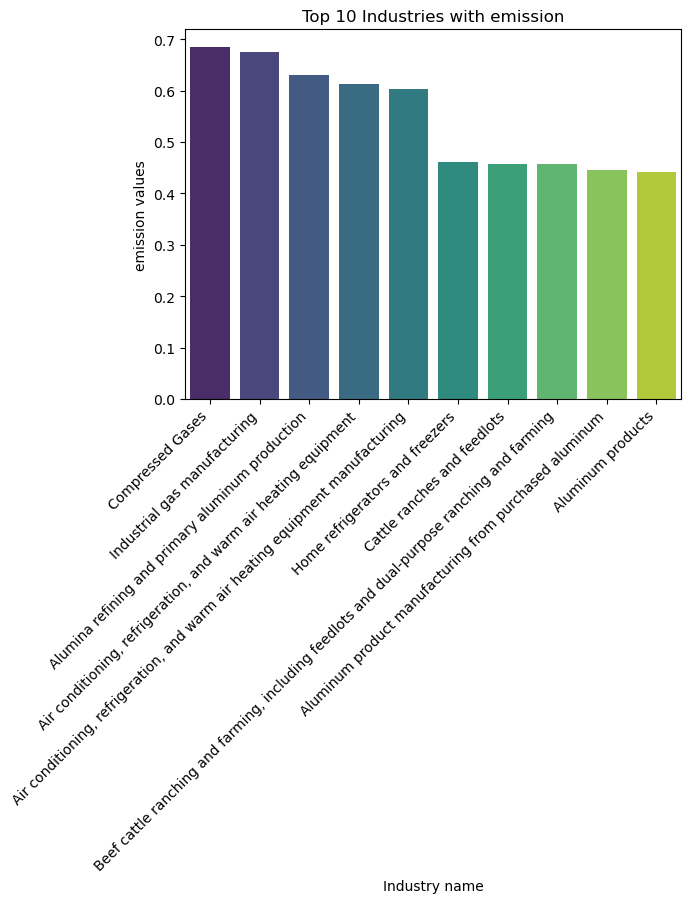

In [94]:
sns.barplot(data=agg_df,x=agg_df.index,y="Mean_Factor",hue="Name",palette="viridis")
plt.title("Top 10 Industries with emission")
plt.xlabel("Industry name")
plt.ylabel("emission values")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [95]:
# agg_df.reset_index()

In [96]:
df1.drop(columns=["Name","Code","Year"],inplace=True)

In [97]:
df1

,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,"Unit_kg/2018 USD, purchaser price",Substance_methane,Substance_nitrous oxide,Substance_other GHGs,Source_Industry
0,1.947243,2.490472,1.935383,4,3,1,4,1,1,0,0,0,0
1,-0.640813,-0.204867,-0.605553,4,3,1,1,1,1,1,0,0,0
2,-0.602355,-0.448746,-0.605553,4,3,1,4,1,1,0,1,0,0
3,-0.602355,-0.448746,-0.605553,3,3,1,3,1,0,0,0,1,0
4,1.978013,2.494155,1.962222,4,3,1,4,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22087,-0.350380,-0.448746,-0.378371,4,2,1,5,1,0,0,0,1,1
22088,-0.679921,-0.448746,-0.675036,4,2,1,5,1,1,0,0,0,1
22089,-0.679921,-0.448746,-0.675036,4,2,1,5,1,1,1,0,0,1
22090,-0.679921,-0.448746,-0.675036,4,2,1,5,1,1,0,1,0,1


<Axes: >

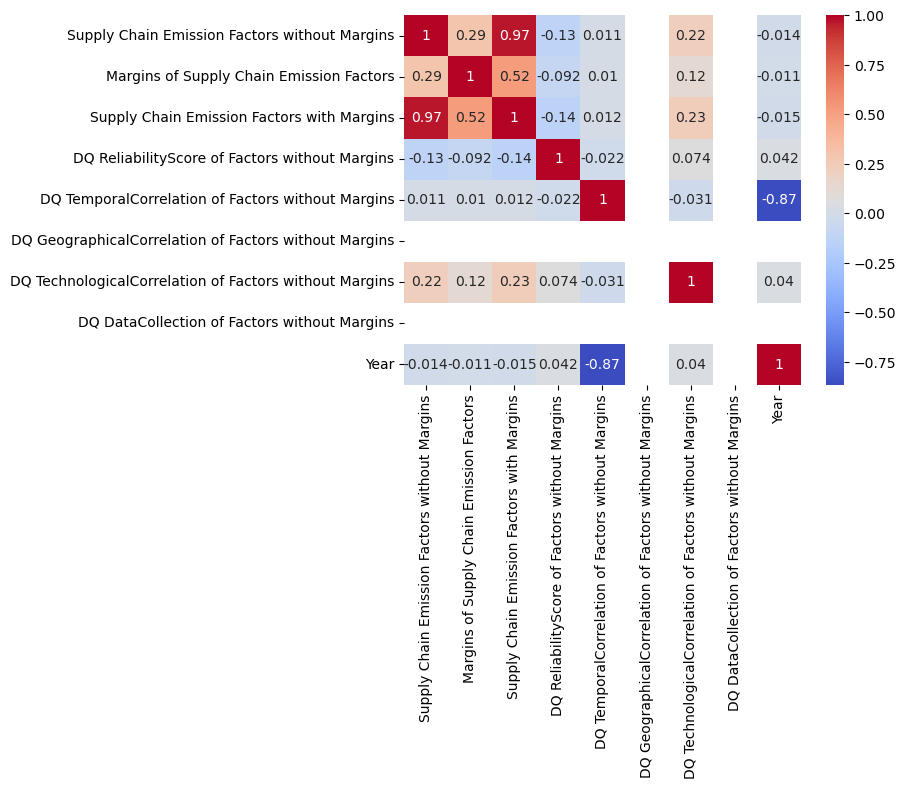

In [98]:
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True,fmt='.2g',cmap="coolwarm")

In [99]:
# how is the distribution among the object dtype 

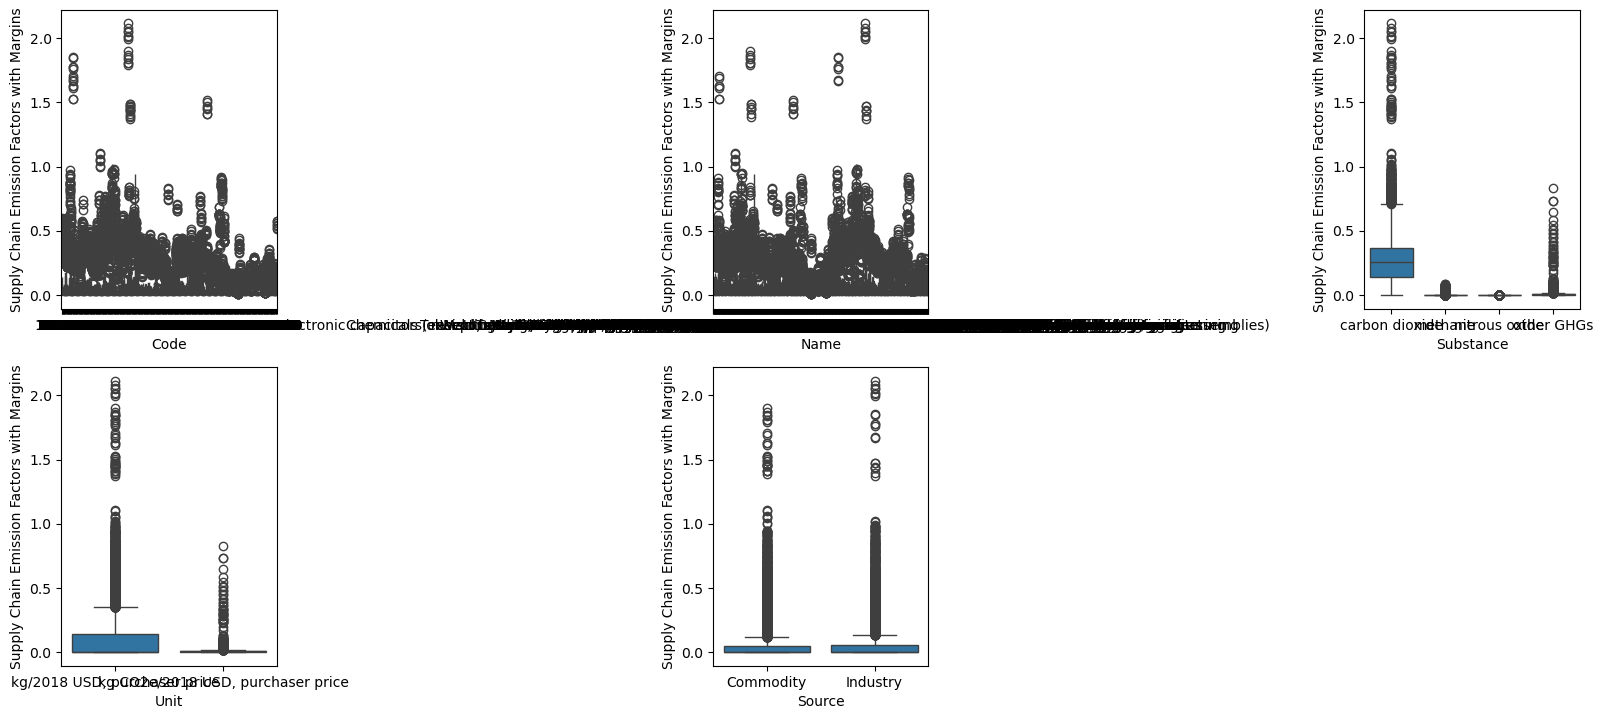

In [100]:
plt.figure(figsize=(16,14))
for i,col in enumerate(df.select_dtypes(include="object").columns,1):
    plt.subplot(4,3,i)
    sns.boxplot(x=col, y = "Supply Chain Emission Factors with Margins", data = df)
plt.tight_layout()

In [101]:
df1.columns

Index(['Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins',
       'Unit_kg/2018 USD, purchaser price', 'Substance_methane',
       'Substance_nitrous oxide', 'Substance_other GHGs', 'Source_Industry'],
      dtype='object')

In [104]:
feature_columns = [col for col in df_features.columns if col not in 
                  ['Code', 'Name', 'Substance', 'Unit', 'Source', "Supply Chain Emission Factors with Margins"]]

In [109]:
df1

,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,"Unit_kg/2018 USD, purchaser price",Substance_methane,Substance_nitrous oxide,Substance_other GHGs,Source_Industry
0,1.947243,2.490472,1.935383,4,3,1,4,1,1,0,0,0,0
1,-0.640813,-0.204867,-0.605553,4,3,1,1,1,1,1,0,0,0
2,-0.602355,-0.448746,-0.605553,4,3,1,4,1,1,0,1,0,0
3,-0.602355,-0.448746,-0.605553,3,3,1,3,1,0,0,0,1,0
4,1.978013,2.494155,1.962222,4,3,1,4,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22087,-0.350380,-0.448746,-0.378371,4,2,1,5,1,0,0,0,1,1
22088,-0.679921,-0.448746,-0.675036,4,2,1,5,1,1,0,0,0,1
22089,-0.679921,-0.448746,-0.675036,4,2,1,5,1,1,1,0,0,1
22090,-0.679921,-0.448746,-0.675036,4,2,1,5,1,1,0,1,0,1


In [112]:
df1['Margin_Ratio'] = df1['Margins of Supply Chain Emission Factors'] / (
    df_features['Supply Chain Emission Factors without Margins'] + 1e-8)

df1['Efficiency_Score'] = df1['Supply Chain Emission Factors without Margins'] / (
    df_features['Supply Chain Emission Factors with Margins'] + 1e-8)


In [113]:

df1['Total_Quality_Score'] = df1[quality_cols].sum(axis=1)
df1['Avg_Quality_Score'] = df1[quality_cols].mean(axis=1)
df1['Min_Quality_Score'] = df1[quality_cols].min(axis=1)
df1['Max_Quality_Score'] = df1[quality_cols].max(axis=1)

In [115]:
df1

,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,"Unit_kg/2018 USD, purchaser price",Substance_methane,Substance_nitrous oxide,Substance_other GHGs,Source_Industry,Margin_Ratio,Efficiency_Score,Total_Quality_Score,Avg_Quality_Score,Min_Quality_Score,Max_Quality_Score
0,1.947243,2.490472,1.935383,4,3,1,4,1,1,0,0,0,0,7.433298e+00,5.054329e+00,13,2.6,1,4
1,-0.640813,-0.204867,-0.605553,4,3,1,1,1,1,1,0,0,0,-2.049678e+02,-3.207251e+02,10,2.0,1,4
2,-0.602355,-0.448746,-0.605553,4,3,1,4,1,1,0,1,0,0,-2.245964e+02,-3.014770e+02,13,2.6,1,4
3,-0.602355,-0.448746,-0.605553,3,3,1,3,1,0,0,0,1,0,-2.245964e+02,-3.014770e+02,11,2.2,1,3
4,1.978013,2.494155,1.962222,4,3,1,4,1,1,0,0,0,0,4.927066e+00,3.571162e+00,13,2.6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22087,-0.350380,-0.448746,-0.378371,4,2,1,5,1,0,0,0,1,1,-5.008470e+01,-3.910600e+01,13,2.6,1,5
22088,-0.679921,-0.448746,-0.675036,4,2,1,5,1,1,0,0,0,1,-4.487465e+07,-6.799209e+07,13,2.6,1,5
22089,-0.679921,-0.448746,-0.675036,4,2,1,5,1,1,1,0,0,1,-4.487465e+07,-6.799209e+07,13,2.6,1,5
22090,-0.679921,-0.448746,-0.675036,4,2,1,5,1,1,0,1,0,1,-4.487465e+07,-6.799209e+07,13,2.6,1,5


# model building

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
# import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [116]:
X=df1.drop(columns=["Supply Chain Emission Factors with Margins"],axis=1).values
y=df1["Supply Chain Emission Factors with Margins"]

In [119]:
print(f"Features used for modeling: {len(feature_columns)}")
print(f"Sample size: {len(X)}")

Features used for modeling: 17
Sample size: 22092


In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3, stratify=df_features['Source'])


In [122]:
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (17673, 18)
Test set: (4419, 18)


In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection

In [136]:
feature_columns

['Supply Chain Emission Factors without Margins',
 'Margins of Supply Chain Emission Factors',
 'DQ ReliabilityScore of Factors without Margins',
 'DQ TemporalCorrelation of Factors without Margins',
 'DQ GeographicalCorrelation of Factors without Margins',
 'DQ TechnologicalCorrelation of Factors without Margins',
 'DQ DataCollection of Factors without Margins',
 'Year',
 'Margin_Ratio',
 'Efficiency_Score',
 'Total_Quality_Score',
 'Avg_Quality_Score',
 'Min_Quality_Score',
 'Max_Quality_Score',
 'Years_Since_2010',
 'Substance_Encoded',
 'Source_Encoded']

In [134]:

print("FEATURE SELECTION")
selector = SelectKBest(score_func=f_regression, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

FEATURE SELECTION


In [139]:
selected_features = np.array(feature_columns)[selector.get_support()]
print(f"Selected features: {list(selected_features)}")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 23 but corresponding boolean dimension is 18

In [141]:
RANDOM_STATE=3

In [143]:

models = {
    'Random Forest': RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1),
    'Extra Trees': ExtraTreesRegressor(random_state=RANDOM_STATE, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=RANDOM_STATE),
    'Ridge': Ridge(random_state=RANDOM_STATE),
    'Lasso': Lasso(random_state=RANDOM_STATE),
    'ElasticNet': ElasticNet(random_state=RANDOM_STATE),
    'SVR': SVR()
}


In [144]:
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Extra Trees': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Ridge': {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    },
    'Lasso': {
        'alpha': [0.001, 0.01, 0.1, 1.0]
    },
    'ElasticNet': {
        'alpha': [0.001, 0.01, 0.1, 1.0],
        'l1_ratio': [0.1, 0.5, 0.9]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'linear']
    }
}

In [ ]:
results = {}
best_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use selected features for linear models, all features for tree-based models
    if name in ['Ridge', 'Lasso', 'ElasticNet', 'SVR']:
        X_train_model = X_train_selected
        X_test_model = X_test_selected
    else:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    
    # Grid search
    grid_search = GridSearchCV(
        model, param_grids[name], 
        cv=5, scoring='r2', n_jobs=-1, verbose=0
    )
    
    grid_search.fit(X_train_model, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    
    # Predictions
    y_pred = best_model.predict(X_test_model)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(best_model, X_train_model, y_train, cv=5, scoring='r2')
    
    results[name] = {
        'R2_Score': r2,
        'MSE': mse,
        'MAE': mae,
        'CV_R2_Mean': cv_scores.mean(),
        'CV_R2_Std': cv_scores.std(),
        'Best_Params': grid_search.best_params_
    }
    
    print(f"  R² Score: {r2:.4f}")
    print(f"  Cross-validation R² (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")



Training Random Forest...
  R² Score: 0.9999
  Cross-validation R² (mean ± std): 1.0000 ± 0.0000

Training Extra Trees...
  R² Score: 1.0000
  Cross-validation R² (mean ± std): 1.0000 ± 0.0000

Training Gradient Boosting...
  R² Score: 1.0000
  Cross-validation R² (mean ± std): 1.0000 ± 0.0000

Training Ridge...
  R² Score: 0.9952
  Cross-validation R² (mean ± std): 0.9958 ± 0.0006

Training Lasso...
  R² Score: 0.9950
  Cross-validation R² (mean ± std): 0.9957 ± 0.0006

Training ElasticNet...
  R² Score: 0.9952
  Cross-validation R² (mean ± std): 0.9958 ± 0.0005

Training SVR...


In [ ]:
print("MODEL COMPARISON")
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2_Score', ascending=False)
print(results_df.round(4))

In [ ]:
# Best model analysis
best_model_name = results_df.index[0]
best_model = best_models[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"Best R² Score: {results_df.loc[best_model_name, 'R2_Score']:.4f}")
print(f"Best Parameters: {results[best_model_name]['Best_Params']}")


In [ ]:
# if hasattr(best_model, 'feature_importances_'):
#     print(f"FEATURE IMPORTANCE ({best_model_name}) ===")
#     if best_model_name in ['Ridge', 'Lasso', 'ElasticNet', 'SVR']:
#         feature_names = selected_features
#         importances = abs(best_model.coef_) if hasattr(best_model, 'coef_') else np.zeros(len(selected_features))
#     else:
#         feature_names = feature_columns
#         importances = best_model.feature_importances_
    
#     feature_importance_df = pd.DataFrame({
#         'Feature': feature_names,
#         'Importance': importances
#     }).sort_values('Importance', ascending=False)
    
#     print(feature_importance_df.head(10))